# Classification
    0,1로 분류하는 문제에서 linear regression 직선을 그어 분류를 한다고 했을 때 x값에 대응하는 y햇은 실수가 나오는데 0,1로 맞춰야 하므로, y햇이 특정값 (ex. 0.5)일 때를 기준으로 해당하는 x값에서 더 크면 1로 분류, 그보다 낮으면 0으로 분류하는 후처리가 필요하다.
    outlier가 있을 때 linear regression 직선을 그으면 outlier에 의해 기준이 되는 x값이 편향되게 나올 것이고 전반적인 데이터를 분류하는데 문제가 생긴다 -> y값의 범위를 0~1사이가 보장되는 모델을 사용해야함

## sigmoid function
    선형 회귀로 구한 식 세타transpose*x에 대해 sigmoid 함수에 넣으면 그 y햇의 범위는 0과 1사이로 나온다 -> 로지스틱 회귀에 적합
    sigmoid 함수값 중간인 0.5 에 대응하는 세타transpose * x의 값은 0 -> 즉 세타transpose * x > 0일때 y가 1로 분류, 세타transpose * x < 0일때 y가 0으로 분류 -> 다중 logistic regression에서도 마찬가지(세타는 세타들의 벡터이고 x는 x들의 벡터이므로 변수 여러개임)
    
    시그모이드 함수는 e^(ax+b)와 e^0의 비율을 따질 때 사용
    밑에 사진으로 증명

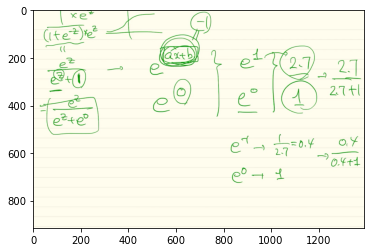

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
img = imread("시그모이드 함수 풀이.png")
plt.imshow(img)
plt.show()

# Logistic Regression Cost-function
    비용함수의 결과 최소화 -> 오류를 최소화
    logistic regression에서 y=1로 예측을 했을 때 sigmoid함수값이 0.51이 돼서 1로 예측을 했을 수도, 0.99가 돼서 1로 예측을 했을 수도 있다. 따라서 0.51이 됐을 때는 시그모이드 결과값이 1이라고 해도 loss가 어느정도 있는 것이고, 0.99가 됐을 때는 loss가 거의 없는 것. 즉, 시그모이드 결과값과 실제값이 같다고 해서 cost function을 그대로 냅두는게 아니고 다시 파라미터를 수정(gradient descent)해서 다시 cost function의 최저점으로 가야함. 따라서 cost function은 sigmoid에 넣는 값에 따라 달라지는데, sigmoid(세타x)가 1로 가까워질수록(실제 값 1일 때) 오류는 0에 수렴하고, sigmoid(세타x)가 0으로 가까워질수록 오류는 무한대에 수렴하게 cost function그래프가 나온다. y=0으로 예측했을 때는 vice versa.
    수식으로 보면 y=1일 때의 손실함수는 -log(h세타(x)) -> h세타(x)는 시그모이드 함수값 (-log(x)함수에서 x가 0부터1 사이일 때만 따온 모양).
    y=0일 때의 손실함수는 -log(1 - h세타(x)) 인데 vice versa 이므로 1-h세타(x)를 한 것 -> h세타(x)자체가 확률을 나타내니까 vice versa는 1-확률이 됨.
    1일 때 0일 때로 각각 if로 나누지말고 하나의 식으로 표현
        -> -ylog(h세타(x) -(1-y)log(1-h세타(x))
            y가 1일 때는 앞에만 살고 뒤엔 죽음, y가 0일 때는 앞에 죽고 뒤엔 삶
            이것을 바탕으로 모든 데이터에 대해 평균을 구한 함수를 구하면 크로스 엔트로피 손실함수가 된다.

# Logistic Regression Gradient Descent
    regression식: ax+b 일 때 Cost(a,b) = -log(1/1+e^-(ax+b))
    Cost(a,b)를 a, b 에 대해 편미분 해야함
    loge x를 미분하면 1/x임. 1/x를 미분하면 -1/(x^2)임
    -log(1/1+e^-(ax+b)는 합성함수 미분을 써야하므로 -(1/(1/1+e^-(ax+b))) * -1/(1+e^-(ax+b))^2 이 된다(아직 안 끝남). 
    (-log(1/x) 미분 -> 전체 미분 * 1/x미분 이므로)
    다시 1+e^(-(ax+b))를 미분해서 곱해야함(-log(1/x)의 x자리에 1+e^-(ax+b) 가 들어갔으므로 합성을 한번더 한 것임.
    e^(-x)의 미분은 -e^(-x)임
    그럼 최종 결과는 -(1/(1/1+e^-(ax+b))) * -1/(1+e^-(ax+b))^2 * -e^(-(ax+b)) 가 됨
    이것을 정리해보면 -e^(-(ax+b)) / (1+e^-(ax+b)) 가 된다.
    여기까지는 a,b에 대한 미분은 똑같음. 이후부터 a, b편미분에 따라 달라짐.
    a에 대해 편미분: 계수 x를 곱해야 하므로 -e^(-(ax+b)) / (1+e^-(ax+b)) * x
    b에 대해 편미분: 계수 1을 곱하므로 -e^(-(ax+b)) / (1+e^-(ax+b))
    
    ax+b = z 라고 하면 a에 대해 편미분한 결과는 ((1/1+e^-z) - 1) * x 이 되고 해석하면 (예측값 - 실제값(이때는 1)) * x 가 되므로
    예측값과 실제값의 차이가 커지면 gradient의 절대값이 커지는 것
    정리하면 (예측값 - 실제값)* 해당하는 파라미터의 입력feature(x)를 다합하고 거기에 learning rate을 곱해서 이거를 파라미터 세타에서 빼주면 다음 파라미터가 나옴 -> linear regression과 형태가 같게 나옴.

## Multi-Class Classification
    데이터들을 각각의 클래스로 구분하고 for문을 도는데 클래스 하나 vs 나머지 (One vs All)
    즉 binary classification을 여러번 하고 max를 찾음.
    각각의 클래스가 positive class일 가능성을 도출하는 각각의 모델이 있을 것이고 그 모델들 중에서 가장 가능성이 높은 것을 잡고 class 분류 -> max(hi세타(x)) -> h(세타(x))를 가장 크게 하는 i번째 클래스를 채택
    softmax 함수-> sigmoid 함수보다 multi-class classification에서 더 잘 쓰임. 시그모이드는 해당 클래스의 가능성과 e^0을 비교하는 거였다면 softmax는 모든 클래스의 가능성들끼리 비교를 하기 때문에 총합은 1(100%)이 나옴. softmax 쓸거면 따로 loss function을 구해야함.
   